In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

In [ ]:
df= pd.read_csv("/content/creditcard (1).csv")

In [ ]:
df.tail

<bound method NDFrame.tail of         Time        V1        V2        V3        V4        V5        V6  \
0          0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1          0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2          1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3          1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4          2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
...      ...       ...       ...       ...       ...       ...       ...   
21873  31906  1.285161 -0.701455  0.221870 -0.744753 -0.674967  0.034267   
21874  31906 -0.345979  1.094568  1.282208  0.068241 -0.016965 -0.989567   
21875  31907  1.171852  0.718042 -0.227521  1.373722  0.152349 -0.949840   
21876  31907  1.209330 -1.130242  1.614261  0.000265 -1.974416  0.262320   
21877  31907 -0.184653  0.376693  0.632988 -2.282365  0.403553 -0.371666   

             V7        V8        V9  ...       V21       

In [ ]:
df.head

<bound method NDFrame.head of         Time        V1        V2        V3        V4        V5        V6  \
0          0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1          0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2          1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3          1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4          2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
...      ...       ...       ...       ...       ...       ...       ...   
21873  31906  1.285161 -0.701455  0.221870 -0.744753 -0.674967  0.034267   
21874  31906 -0.345979  1.094568  1.282208  0.068241 -0.016965 -0.989567   
21875  31907  1.171852  0.718042 -0.227521  1.373722  0.152349 -0.949840   
21876  31907  1.209330 -1.130242  1.614261  0.000265 -1.974416  0.262320   
21877  31907 -0.184653  0.376693  0.632988 -2.282365  0.403553 -0.371666   

             V7        V8        V9  ...       V21       

In [ ]:
df.info

<bound method DataFrame.info of         Time        V1        V2        V3        V4        V5        V6  \
0          0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1          0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2          1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3          1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4          2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
...      ...       ...       ...       ...       ...       ...       ...   
21873  31906  1.285161 -0.701455  0.221870 -0.744753 -0.674967  0.034267   
21874  31906 -0.345979  1.094568  1.282208  0.068241 -0.016965 -0.989567   
21875  31907  1.171852  0.718042 -0.227521  1.373722  0.152349 -0.949840   
21876  31907  1.209330 -1.130242  1.614261  0.000265 -1.974416  0.262320   
21877  31907 -0.184653  0.376693  0.632988 -2.282365  0.403553 -0.371666   

             V7        V8        V9  ...       V21     

Class a spie chart: 


Text(0, 0.5, '')

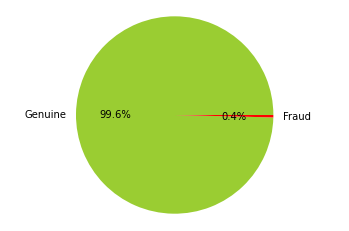

In [ ]:
print("Class a spie chart: ")
fig,aux = plt.subplots(1, 1)
aux.pie(df.Class.value_counts(),autopct='%1.1f%%', labels=['Genuine','Fraud'], colors=['yellowgreen','r'])
plt.axis("equal")
plt.ylabel("")

Time variable
21873    8.862778
21874    8.862778
21875    8.863056
21876    8.863056
21877    8.863056
Name: Time_Hr, dtype: float64


Text(0, 0.5, '# transactions')

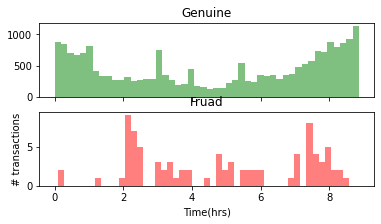

In [ ]:
print("Time variable")
df["Time_Hr"] = df["Time"]/3600
print(df["Time_Hr"].tail(5))
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize=(6,3))
ax1.hist(df.Time_Hr[df.Class==0],bins=48,color='g',alpha=0.5)
ax1.set_title('Genuine')
ax2.hist(df.Time_Hr[df.Class==1],bins=48,color='r',alpha=0.5)
ax2.set_title('Fruad')
plt.xlabel('Time(hrs)')
plt.ylabel('# transactions')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory.

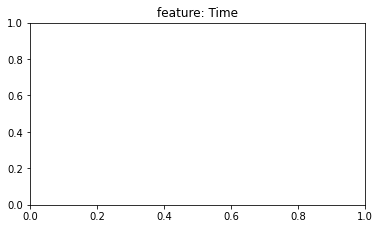

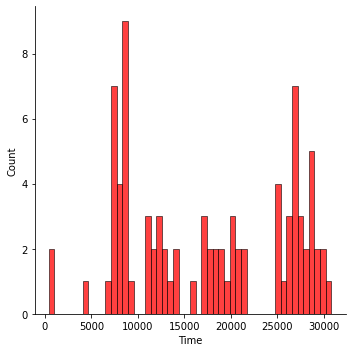

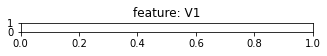

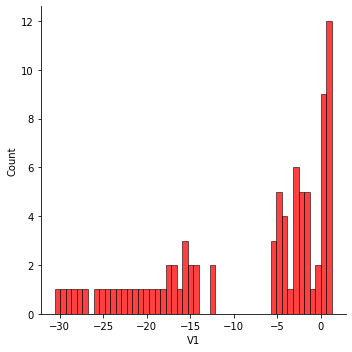

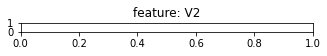

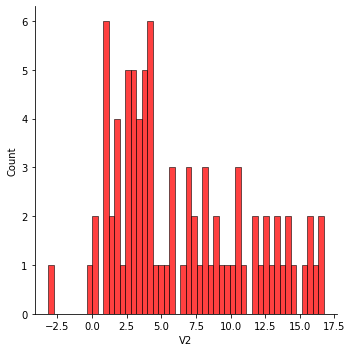

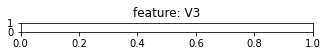

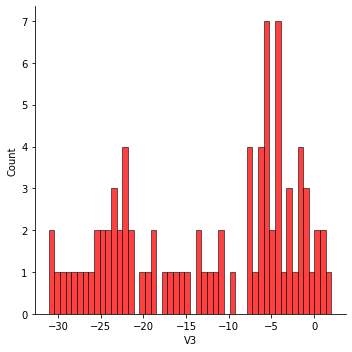

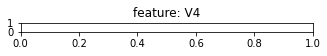

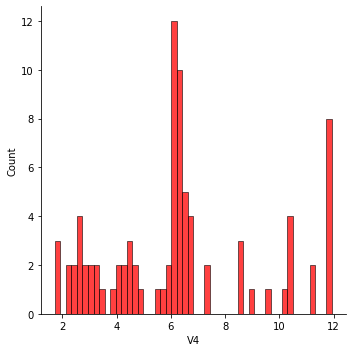

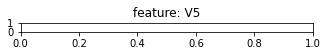

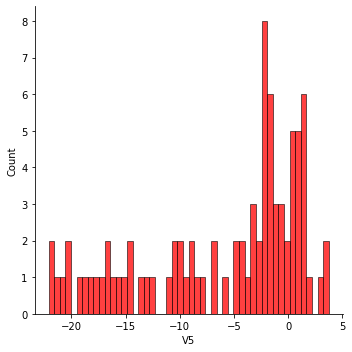

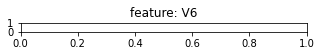

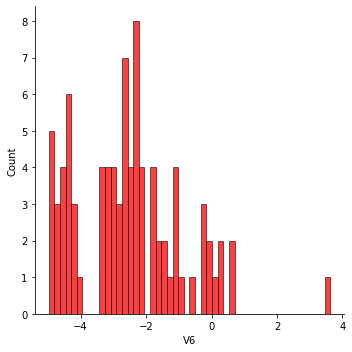

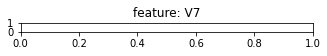

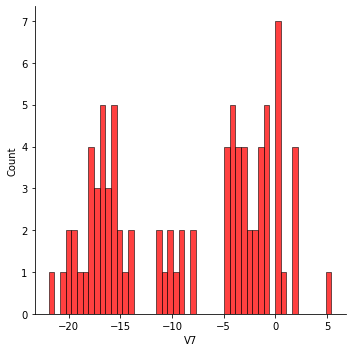

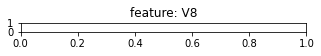

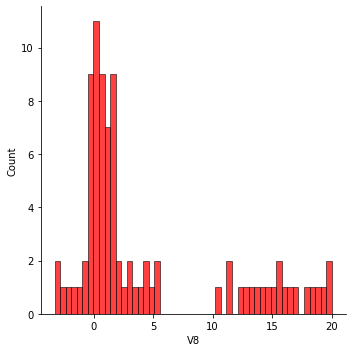

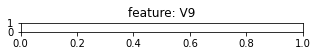

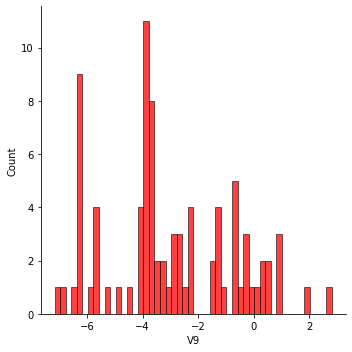

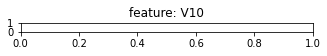

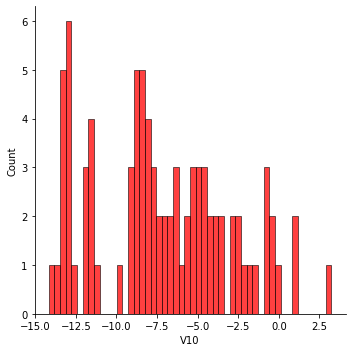

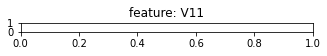

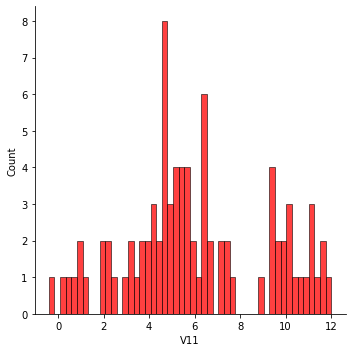

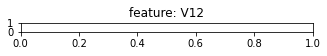

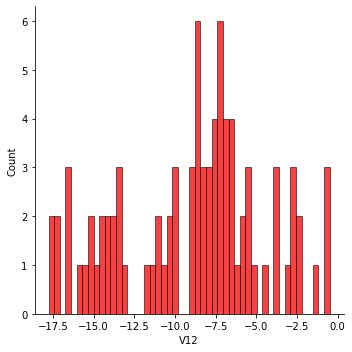

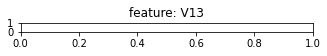

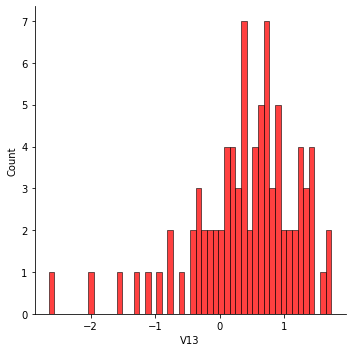

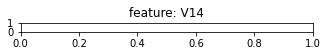

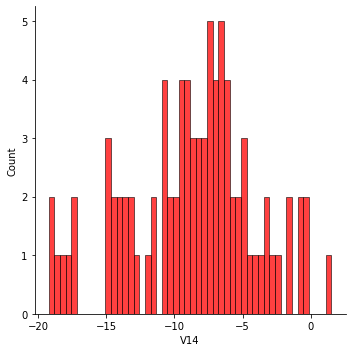

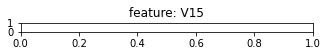

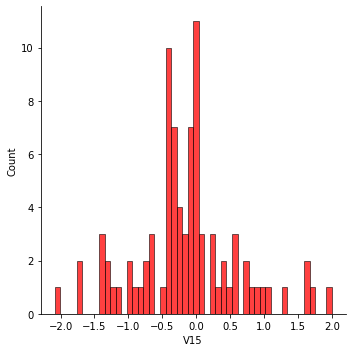

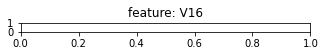

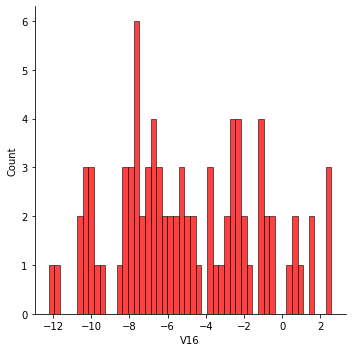

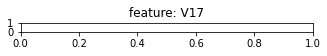

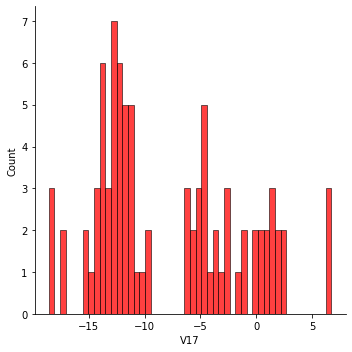

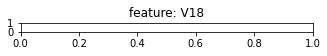

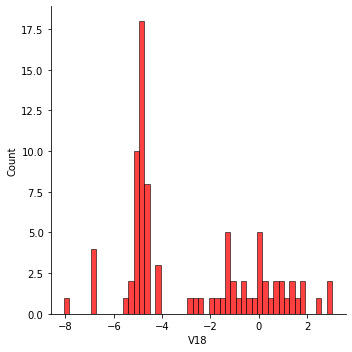

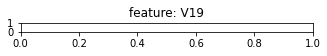

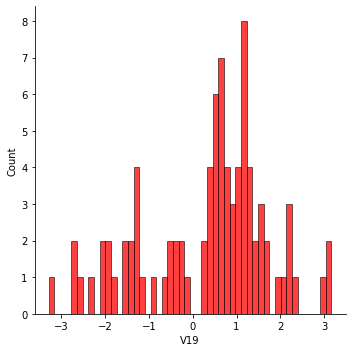

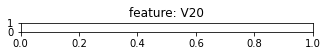

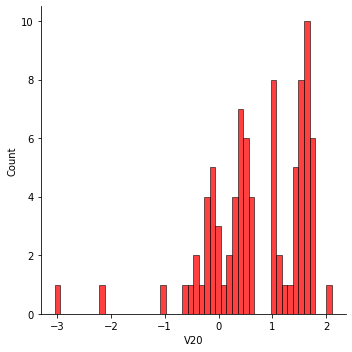

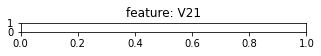

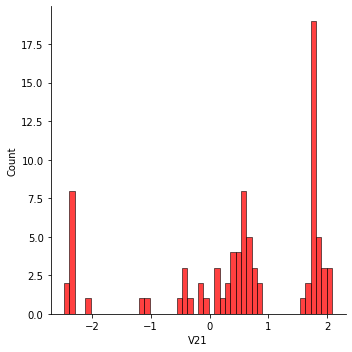

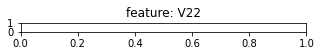

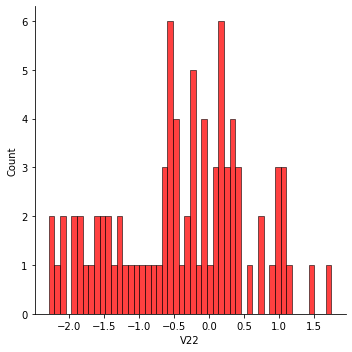

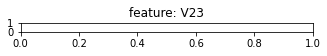

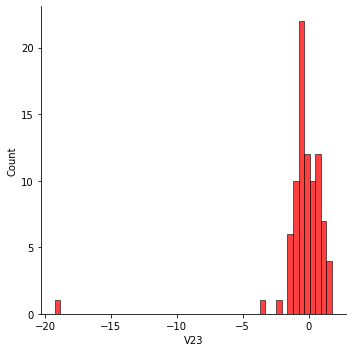

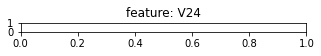

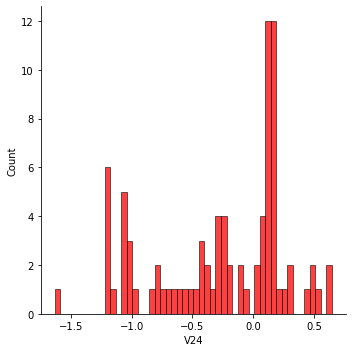

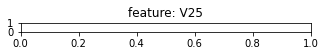

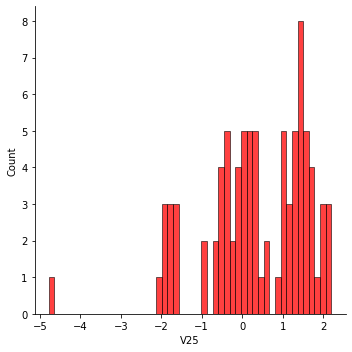

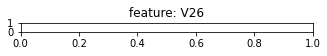

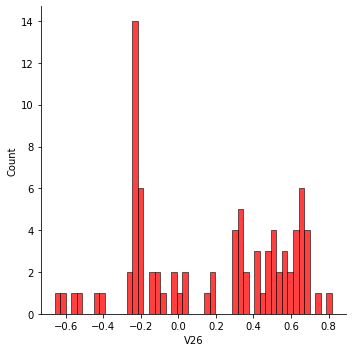

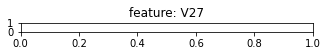

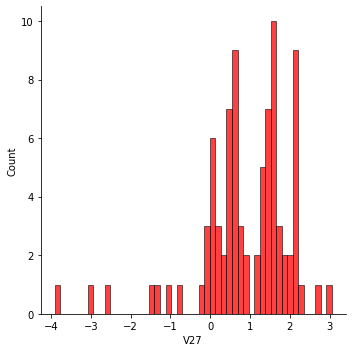

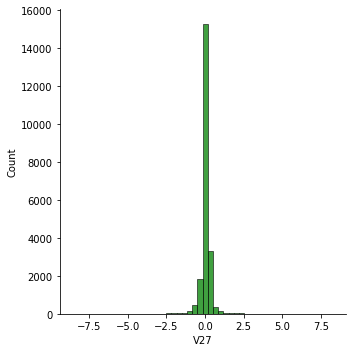

In [ ]:
import seaborn as sns
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(28, 1)
plt.figure(figsize=(6,28*4))
for i, col in enumerate(df[df.iloc[:,0:28].columns]):
  ax5 = plt.subplot(gs[i])
  sns.displot(df[col][df.Class == 1], bins=50, color='r')
  sns.displot(df[col][df.Class == 0], bins=50, color='g')
  ax5.set_xlabel('')
  ax5.set_title('feature: '+ str(col))
plt.show()  

In [ ]:
droplist=["V2","V5","V6","V7","V8","V13","V15","V19","V20","V21","V22","V23","V24","V25","V26","V27"]
df.drop(dropli)